# Group Coursework 

## Preparing Dataset

**Import Library**


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp

import scipy.stats as sps

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

**Pulling Data**

Original data file is from https://data.london.gov.uk/dataset/ward-profiles-and-atlas

According to the research question, some variables from original file is copied to CSV file

* Borough
* Names
* Median Age in 2011
* Population Density (persons per sq km) in 2011
* No people in household have English as a main language 2011
* All Households 2011
* Mean Modelled Household income (£) 
* Economically active: % Unemployed 2011
* % Overall Absence in All Schools 2011
* Rates children (0-18) living in Out-of-work Benefit Claimant Households 2011
    * The numbers and percentages of children living in households where a parent or guardian claimed out-of-work benefits
* Total crime (numbers) 2011
* Total Crime Rate 2011
* Drugs Crime Total Number 2011
* % People with Bad or Very Bad Health 2011 
* % area that is greenspace 

In [3]:
gcd = pd.read_csv('copiedfromwarddataatlas.csv')

In [4]:
gcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 15 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Borough                                                                       625 non-null    object 
 1   Names                                                                         625 non-null    object 
 2   Median Age 2011                                                               625 non-null    int64  
 3   Population Density (persons per sq km) 2011                                   625 non-null    float64
 4   No people in household have English as a main language 2011                   625 non-null    int64  
 5   All Households 2011                                                           625 non-null    int64  
 6   Mean Modelled Household income (£)

In [5]:
gcd.head()

,Borough,Names,Median Age 2011,Population Density (persons per sq km) 2011,No people in household have English as a main language 2011,All Households 2011,Mean Modelled Household income (£) 2012/13,Economically active: % Unemployed 2011,Overall Absence in All Schools %,Rates children (0-18) living in Out-of-work Benefit Claimant Households 2011,Total crime (numbers) 2011,Total Crime Rate 2011,Drugs Crime Total Number 2011,% People with Bad or Very Bad Health 2011,% area that is greenspace 2012
0,City of London,City of London,39,"2,312.5000",523,4385,99390,4.5000,4.3000,12.0000,5437,612.0000,450,3.4000,18.6000
1,Barking and Dagenham,Abbey,29,"9,884.6000",1175,4572,38870,14.5000,5.6000,28.5000,2346,182.6000,197,4.3000,19.6000
2,Barking and Dagenham,Alibon,32,"7,464.3000",315,3971,37290,12.2000,5.7000,33.5000,955,91.4000,45,6.7000,22.4000
3,Barking and Dagenham,Becontree,32,"8,923.1000",451,4277,37860,13.8000,5.9000,32.6000,1146,98.8000,58,7.0000,3.0000
4,Barking and Dagenham,Chadwell Heath,34,"2,970.6000",257,3942,38860,12.1000,6.2000,30.2000,984,97.4000,26,6.8000,56.4000


In [6]:
gcd = gcd.dropna()

**Data Clean**

Eliminating effect of population and scale problem

In [7]:
#Transforming the number of people in household that is not have English as main language to rate per 1000 household among all household
no_english_in_household = gcd["No people in household have English as a main language 2011"]/gcd["All Households 2011"]*1000

#Transforming the number of drugs related crime number to rate of drugs crime per 1000 crime
rate_of_drugs_crime = gcd["Drugs Crime Total Number 2011"]/gcd["Total crime (numbers) 2011"]*1000

Normalization of Income (Min-Max Scalar)

In [8]:
#normalised income per 1000
#max_income = gcd["Mean Modelled Household income (£) 2012/13"].max(axis=0)
#min_income = gcd["Mean Modelled Household income (£) 2012/13"].min(axis=0)
#norm_income = ((gcd["Mean Modelled Household income (£) 2012/13"] - min_income)/(max_income-min_income))*1000


**Getting dependent and independent variables** 

In [10]:
#as independent variable
out_of_work = gcd["Rates children (0-18) living in Out-of-work Benefit Claimant Households 2011"]

#as dependent variables 

rate_of_drugs_crime
no_english_in_household
median_age = gcd["Median Age 2011"]
population_density = gcd["Population Density (persons per sq km) 2011"]
unemployment_rate = gcd["Economically active: % Unemployed 2011"] 
overall_absence = gcd["Overall Absence in All Schools %"]
total_crime_rate = gcd["Total Crime Rate 2011"] 
mean_income = gcd["Mean Modelled Household income (£) 2012/13"]
people_in_bad_health = gcd["% People with Bad or Very Bad Health 2011"] 
green_space = gcd["% area that is greenspace 2012"] 

**Creating Independent Dataset**

In [11]:
gcd_independent = pd.DataFrame()
gcd_dependent = pd.DataFrame()
dict1 = {'mean_income': mean_income, 'rate_of_drugs_crime': rate_of_drugs_crime,
         'no_english_in_household': no_english_in_household, 'median_age': median_age,
        'population_density': population_density, 'unemployment_rate': unemployment_rate,
        'overall_absence': overall_absence, 'total_crime_rate': total_crime_rate,
        'people_in_bad_health': people_in_bad_health, 'green_space': green_space} 
gcd_independent = pd.DataFrame(dict1)
dict2 = {'out_of_work': out_of_work} 
gcd_dependent = pd.DataFrame(dict2)

In [12]:
gcd_independent_final_csv_data = gcd_independent.to_csv('gcd_independent_final.csv', index = True) 

In [13]:
gcd_dependent_final_csv_data = gcd_dependent.to_csv('gcd_dependent_final.csv', index = True) 

## Data Summarise

In [14]:
gcd_independent.describe()

,mean_income,rate_of_drugs_crime,no_english_in_household,median_age,population_density,unemployment_rate,overall_absence,total_crime_rate,people_in_bad_health,green_space
count,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000
mean,"52,515.2640",66.2585,128.5571,34.3072,"8,036.4978",8.7282,5.4979,98.4952,4.9218,27.1267
std,"16,783.6050",35.1483,74.8317,3.9974,"4,762.2226",3.2776,0.5403,110.5444,1.2615,17.5744
min,"32,250.0000",11.1465,4.3228,26.0000,177.6000,3.1000,3.9000,25.6000,1.8000,0.3000
25%,"41,980.0000",42.1394,70.2128,31.0000,"4,528.6000",6.0000,5.2000,62.4000,4.1000,13.8000
50%,"48,410.0000",58.2121,118.8400,33.0000,"6,800.0000",8.4000,5.5000,81.4000,4.8000,23.5000
75%,"57,150.0000",81.1710,180.9705,37.0000,"10,800.0000",10.9000,5.9000,104.9000,5.7000,36.8000
max,"176,950.0000",278.5515,367.2220,46.0000,"29,375.0000",19.4000,7.1000,"1,971.4000",10.9000,88.8000


In [15]:
gcd_dependent.describe()

,out_of_work
count,625.0000
mean,21.8418
std,10.1675
min,0.7000
25%,13.3000
50%,21.8000
75%,29.4000
max,48.7000


## Data Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc4a45d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc800550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc4a4850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc800890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc800710>],
 'means': []}

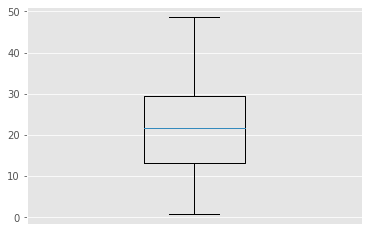

In [136]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(out_of_work, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc316210>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc511190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc316ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc793890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc793a10>],
 'means': []}

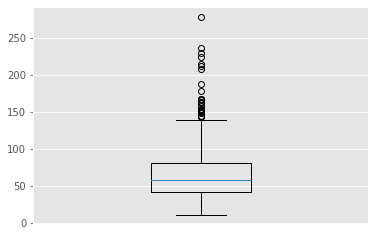

In [137]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(rate_of_drugs_crime, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc18b710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc9c91d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc18bf10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc242190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc38c590>],
 'means': []}

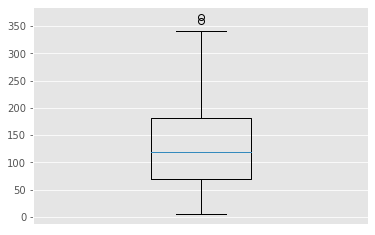

In [138]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(no_english_in_household, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc55a710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc643e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc21bc90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc465710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc46be10>],
 'means': []}

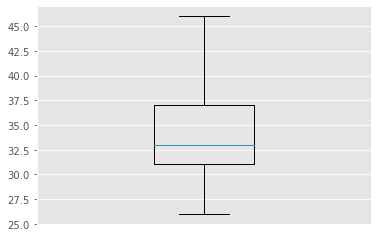

In [139]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(median_age, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f39c930cd50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f39c929e610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f39c9ebc310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f39c929eed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f39c92a7350>],
 'means': []}

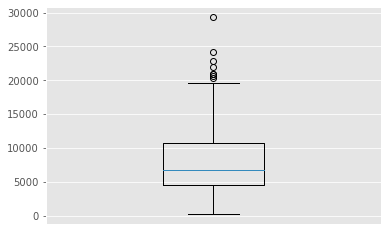

In [16]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(population_density, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc5bcdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc5ca690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc5bc950>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc5caf50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fbfbf3d0>],
 'means': []}

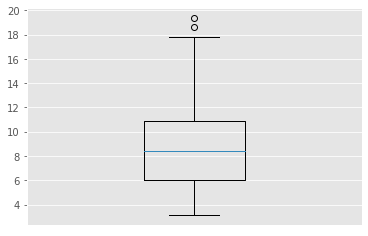

In [141]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(unemployment_rate, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3b5a0ca510>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3b5a31f610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3b5a0bca90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b5a329590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b5a329350>],
 'means': []}

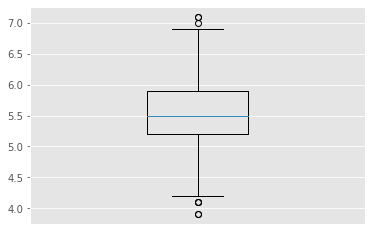

In [16]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(overall_absence, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc101750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc101fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc1012d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc1328d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc132d10>],
 'means': []}

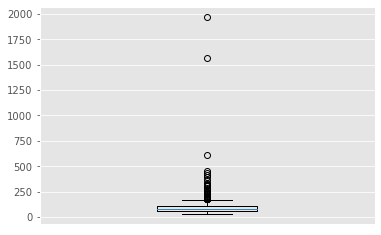

In [143]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(total_crime_rate, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fc144c90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fc13f550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fc144810>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fc13fe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fc15c290>],
 'means': []}

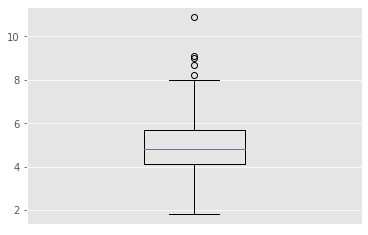

In [144]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(people_in_bad_health, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76fbf72fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76fbf46890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76fbf72b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76fbf69190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76fbf695d0>],
 'means': []}

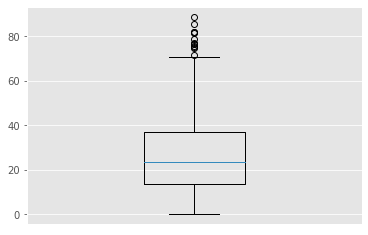

In [145]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(green_space, manage_ticks=(False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3b50affdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3b50b08690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3b50af4350>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b50b08f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b50dd23d0>],
 'means': []}

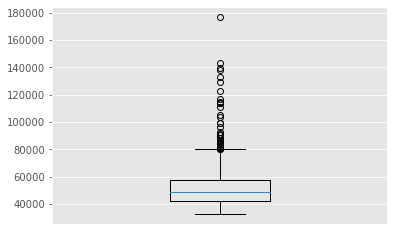

In [17]:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(mean_income, manage_ticks=(False))

## Before Regression

**Correlation Matrix between independent variables**

This matrix shows the correlation between predictor variables

Text(0.5, 1.0, 'Correlation Matrix')

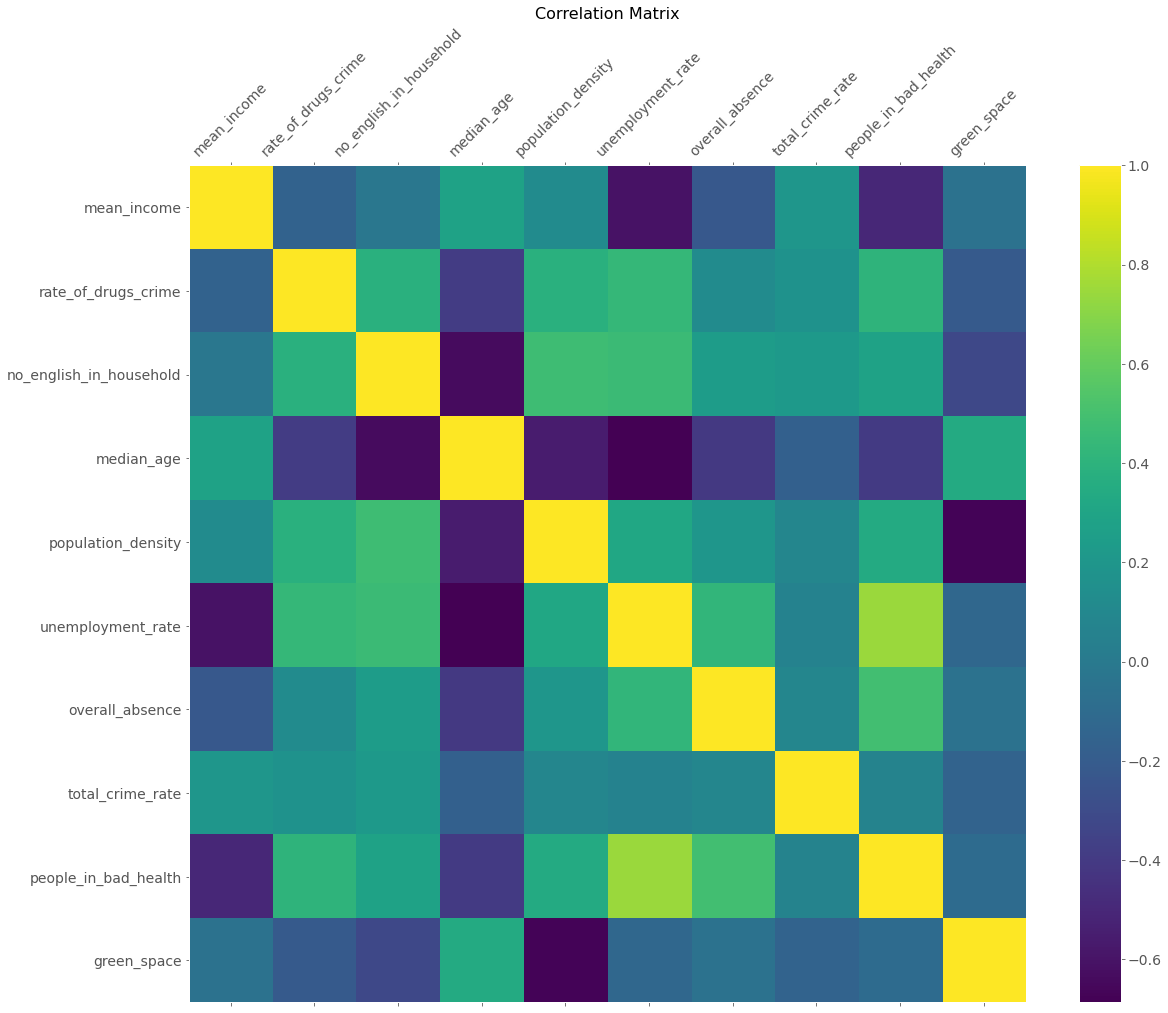

In [18]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(gcd_independent.corr(), fignum=f.number)
plt.xticks(range(gcd_independent.shape[1]), gcd_independent.columns, fontsize=14, rotation=45)
plt.yticks(range(gcd_independent.shape[1]), gcd_independent.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

**Using VIF to deal with multicollinearity**

Calculating VIF and dropping specific dataset if it is bigger than threshold(5)

In [24]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            print('No columns dropped because VIF values are below threshold')
            break

    return df

In [20]:
gcd_predictors_selected_VIF = drop_column_using_vif_(gcd_independent)
print("The columns remaining after VIF selection are:")
print(gcd_predictors_selected_VIF.columns)

Dropping: unemployment_rate
No columns dropped because VIF values are below threshold
The columns remaining after VIF selection are:
Index(['mean_income', 'rate_of_drugs_crime', 'no_english_in_household',
       'median_age', 'population_density', 'overall_absence',
       'total_crime_rate', 'people_in_bad_health', 'green_space'],
      dtype='object')


After VIF Method: 

Text(0.5, 1.0, 'Correlation Matrix')

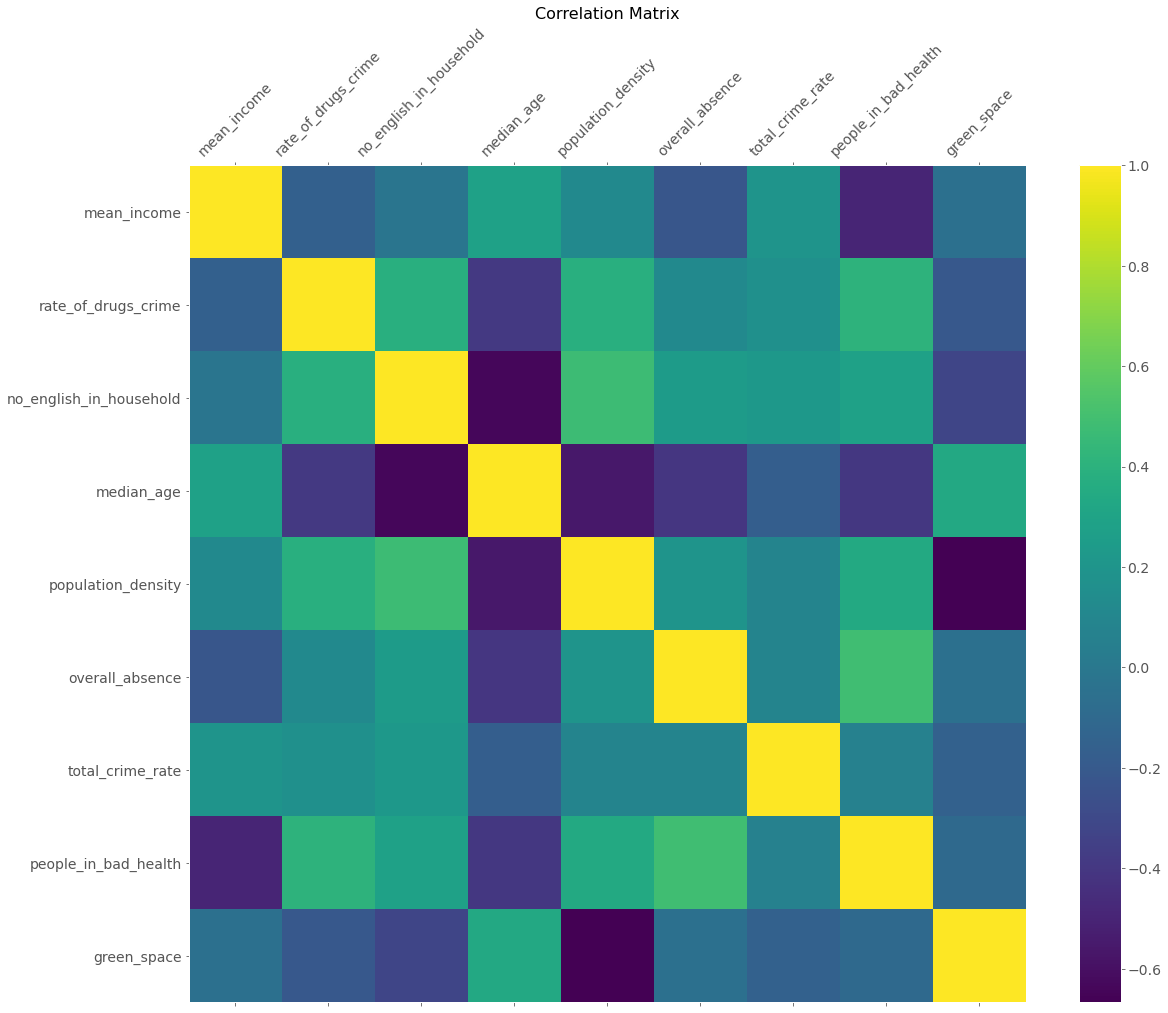

In [21]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(gcd_predictors_selected_VIF.corr(), fignum=f.number)
plt.xticks(range(gcd_predictors_selected_VIF.shape[1]), gcd_predictors_selected_VIF.columns, fontsize=14, rotation=45)
plt.yticks(range(gcd_predictors_selected_VIF.shape[1]), gcd_predictors_selected_VIF.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

## Multiple Regression

In [21]:
X_values = sm.add_constant(gcd_predictors_selected_VIF)
y_values = gcd_dependent

In [22]:
regression_model_a = sm.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     359.4
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          2.77e-238
Time:                        19:06:27   Log-Likelihood:                -1762.6
No. Observations:                 625   AIC:                             3545.
Df Residuals:                     615   BIC:                             3590.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

out_of_work = 40.1668 - 0.0007*(norm_income) 

## Fitted vs Residuals Graphs (LINE Condition Check)

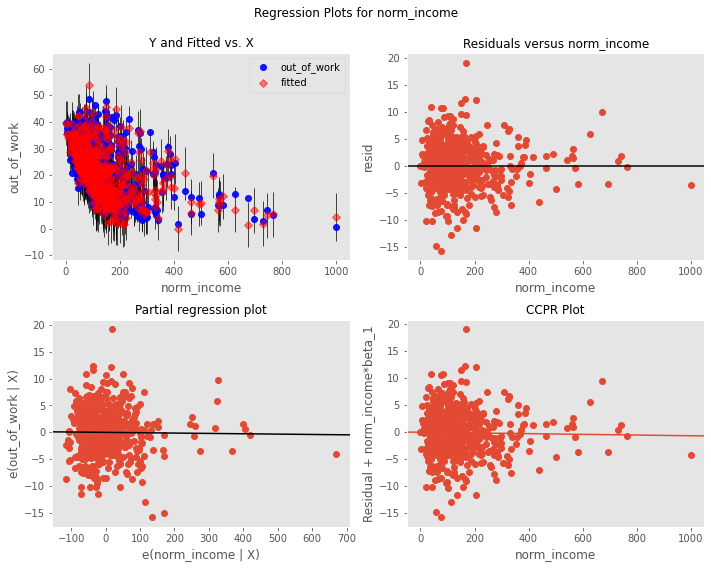

In [95]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'norm_income',fig=fig)

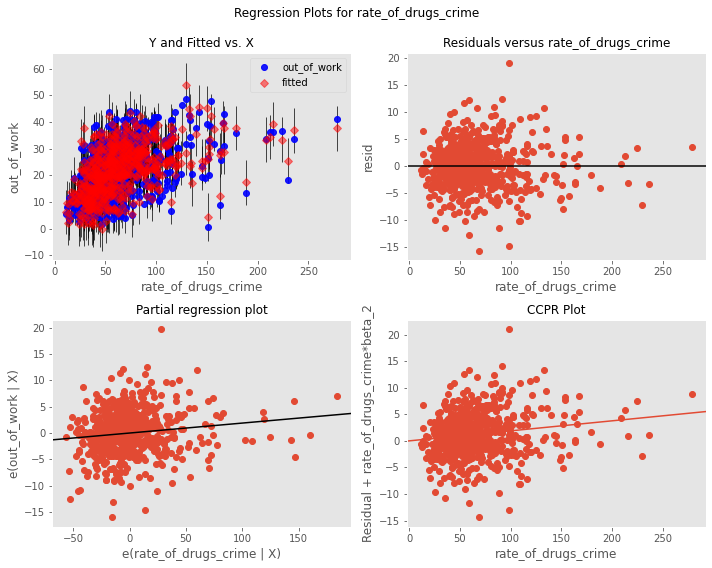

In [96]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'rate_of_drugs_crime',fig=fig)

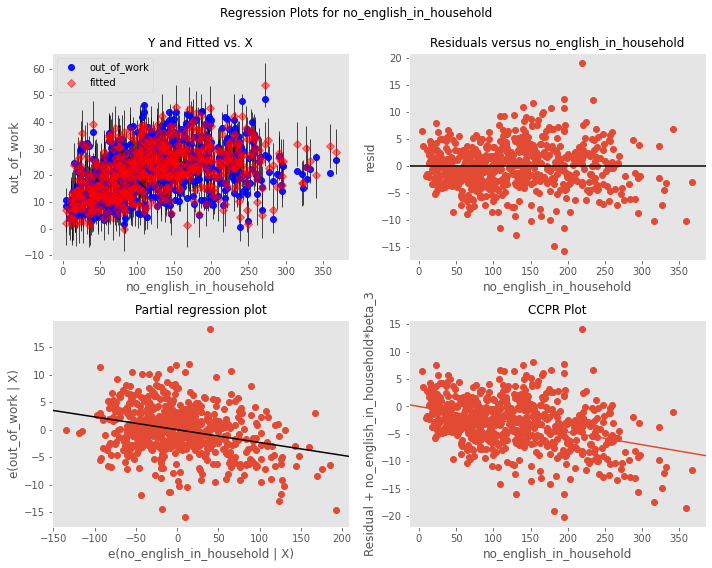

In [98]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'no_english_in_household',fig=fig)

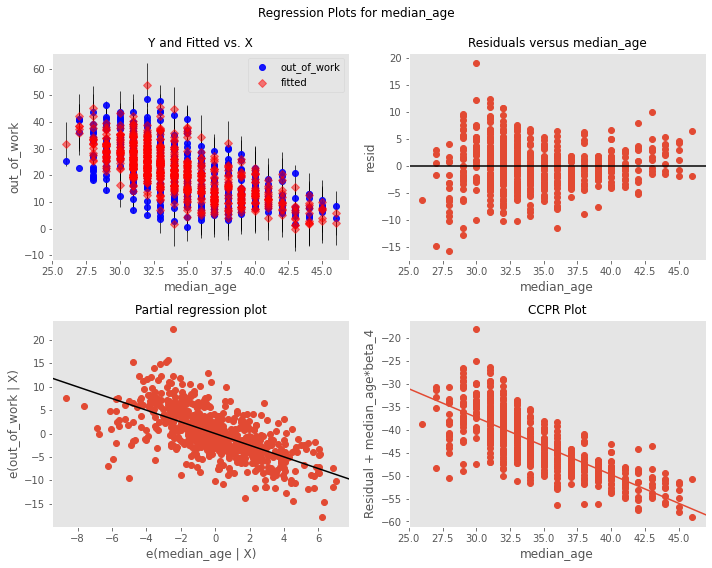

In [99]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'median_age',fig=fig)

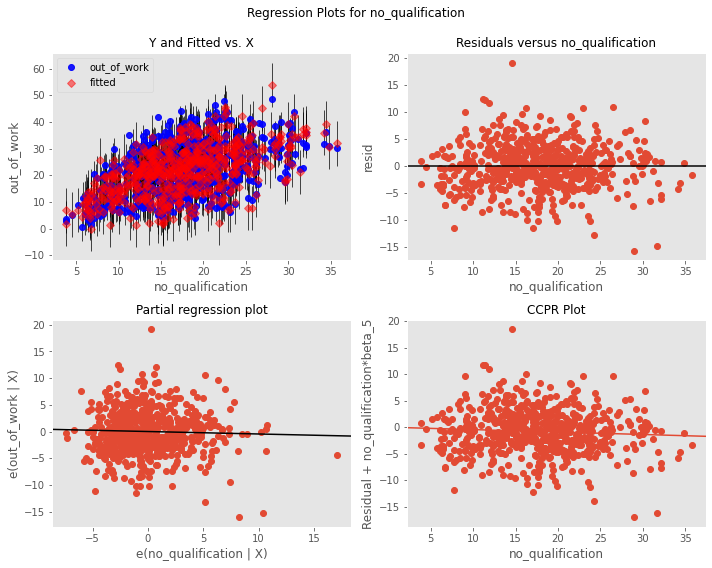

In [101]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'no_qualification',fig=fig)

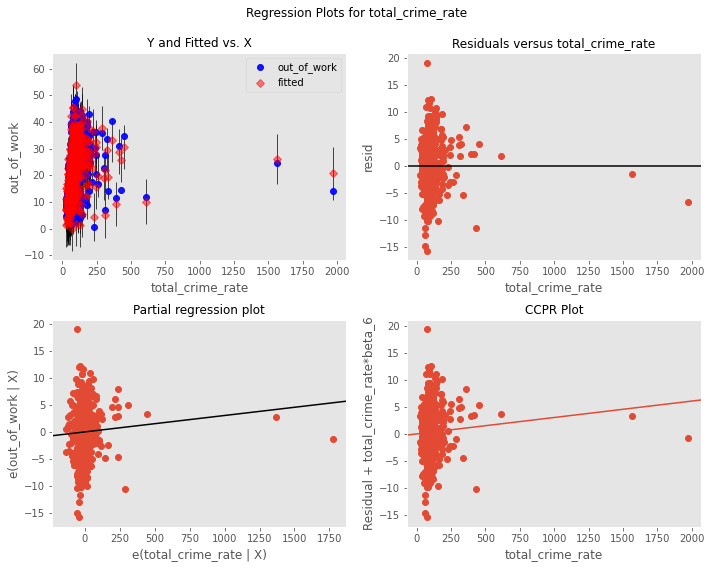

In [102]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'total_crime_rate',fig=fig)

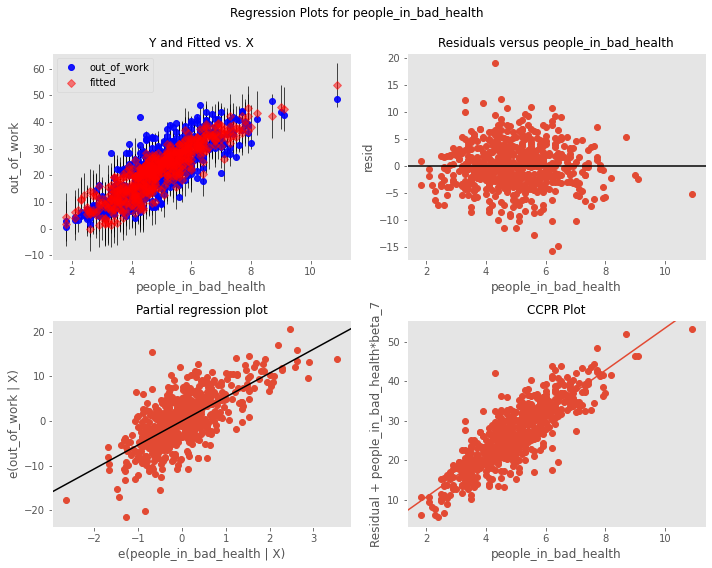

In [103]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'people_in_bad_health',fig=fig)

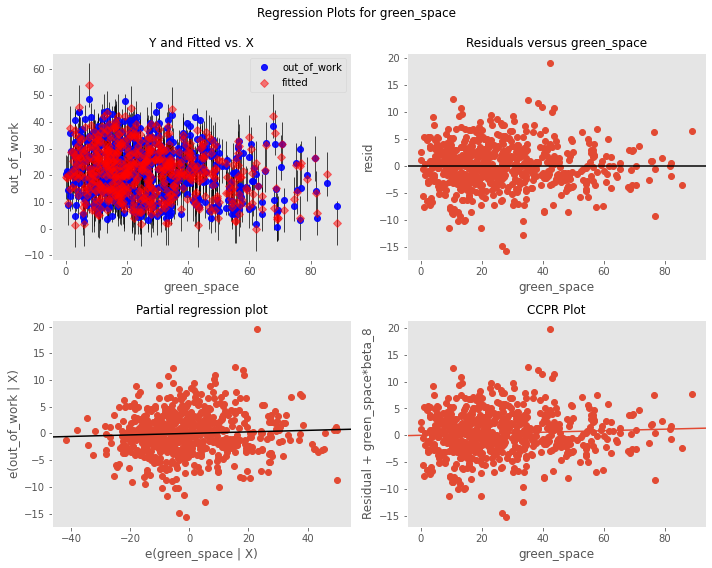

In [104]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'green_space',fig=fig)

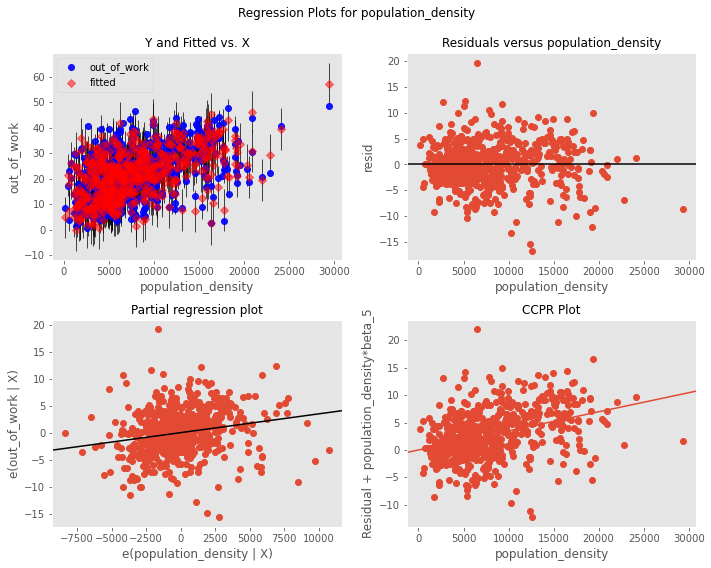

In [23]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'population_density',fig=fig)

## Simple linear Regression

Out of Work vs Norm_income

In [148]:
X_values_linear = sm.add_constant(norm_income)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     165.8
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           8.22e-34
Time:                        18:25:34   Log-Likelihood:                -2262.1
No. Observations:                 625   AIC:                             4528.
Df Residuals:                     623   BIC:                             4537.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [149]:
X_values_linear = sm.add_constant(rate_of_drugs_crime)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     167.8
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           3.80e-34
Time:                        18:25:37   Log-Likelihood:                -2261.3
No. Observations:                 625   AIC:                             4527.
Df Residuals:                     623   BIC:                             4536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0135      0.771     16.869      0.0

In [150]:
X_values_linear = sm.add_constant(no_english_in_household)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     89.52
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           6.12e-20
Time:                        18:25:39   Log-Likelihood:                -2293.9
No. Observations:                 625   AIC:                             4592.
Df Residuals:                     623   BIC:                             4601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6504      0.757     20.674      0.0

In [151]:
X_values_linear = sm.add_constant(median_age)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     502.6
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           4.48e-82
Time:                        18:25:44   Log-Likelihood:                -2151.0
No. Observations:                 625   AIC:                             4306.
Df Residuals:                     623   BIC:                             4315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.1526      2.618     

In [24]:
X_values_linear = sm.add_constant(population_density)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           2.35e-37
Time:                        19:07:11   Log-Likelihood:                -2253.9
No. Observations:                 625   AIC:                             4512.
Df Residuals:                     623   BIC:                             4521.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [153]:
X_values_linear = sm.add_constant(unemployment_rate)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1000.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          1.16e-131
Time:                        18:25:53   Log-Likelihood:                -2036.6
No. Observations:                 625   AIC:                             4077.
Df Residuals:                     623   BIC:                             4086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [154]:
X_values_linear = sm.add_constant(no_qualification)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     201.7
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           7.24e-40
Time:                        18:25:55   Log-Likelihood:                -2248.2
No. Observations:                 625   AIC:                             4500.
Df Residuals:                     623   BIC:                             4509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [155]:
X_values_linear = sm.add_constant(total_crime_rate)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     11.22
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           0.000857
Time:                        18:25:57   Log-Likelihood:                -2330.3
No. Observations:                 625   AIC:                             4665.
Df Residuals:                     623   BIC:                             4673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    20.63

In [142]:
X_values_linear = sm.add_constant(fitted_data)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.69e-36
Time:                        16:22:46   Log-Likelihood:                -2255.9
No. Observations:                 625   AIC:                             4516.
Df Residuals:                     623   BIC:                             4525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9249      1.521      1.266      0.2

In [113]:
X_values_linear = sm.add_constant(people_in_bad_health)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1309.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          3.02e-155
Time:                        16:14:25   Log-Likelihood:                -1982.2
No. Observations:                 625   AIC:                             3968.
Df Residuals:                     623   BIC:                             3977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [106]:
X_values_linear = sm.add_constant(green_space)
y_values_linear= gcd_dependent

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     19.73
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.06e-05
Time:                        16:12:28   Log-Likelihood:                -2326.1
No. Observations:                 625   AIC:                             4656.
Df Residuals:                     623   BIC:                             4665.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Additional Tests

In [19]:
gcd_independent = pd.DataFrame()
gcd_independent_test = pd.DataFrame()
gcd_dependent = pd.DataFrame()
dict1 = {'norm_income': norm_income, 'rate_of_drugs_crime': rate_of_drugs_crime,
         'no_english_in_household': no_english_in_household, 'median_age': median_age,
        'population_density': population_density, 'unemployment_rate': unemployment_rate,
        'no_qualification': no_qualification, 'total_crime_rate': total_crime_rate,
        'people_in_bad_health': people_in_bad_health, 'green_space': green_space} 
gcd_independent = pd.DataFrame(dict1)
dict2 = {'out_of_work': out_of_work} 
gcd_dependent = pd.DataFrame(dict2)

dict3 = {'mean_income_scaled': mean_income_scaled, 'rate_of_drugs_crime': rate_of_drugs_crime,
         'no_english_in_household': no_english_in_household, 'median_age': median_age,
        'population_density': population_density,
         'total_crime_rate': total_crime_rate,
        'people_in_bad_health': people_in_bad_health, 'green_space': green_space,
         'absence': absence3
         } 

gcd_independent_test = pd.DataFrame(dict3)

In [20]:
X_values_test = sm.add_constant(gcd_independent_test)
y_values_test = gcd_dependent

In [21]:
regression_model_a = sm.OLS(y_values_test, X_values_test)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     387.5
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          9.23e-247
Time:                        20:38:13   Log-Likelihood:                -1742.8
No. Observations:                 625   AIC:                             3506.
Df Residuals:                     615   BIC:                             3550.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

$$
OUTOFWORK=19.2491-INCOME*(0.0069)+DRUGS*(0.0201)-NOENGLISH*(0.0226)-
AGE*(0.9834)+DENSITY*(0.0004)+CRIME*(0.0055)+BADHEALTH*(4.2953)+GREEN*(0.0573)+ABSENCE*(2.2870)
$$

$$ \dfrac{x_{i}}{\sum{x}_{i=1}^{n}} $$

In [17]:
Q = gcd["Mean Modelled Household income (£) 2012/13"]
W = (Q-Q.min(axis=0))/(Q.max(axis=0)-Q.min(axis=0))
mean_income_scaled = W*(1000)

## Data Transformation (Log Transformation vs Box-Cox Transformation)

Application of Log Transformation

In [64]:
log_gcd_independent = np.log(gcd_independent)
log_gcd_dependent = np.log(gcd_dependent)

In [30]:
log_gcd_dependent.head()

,out_of_work
0,2.4849
1,3.3499
2,3.5115
3,3.4843
4,3.4078


In [31]:
log_gcd_dependent.describe()

,out_of_work
count,625.0000
mean,2.9430
std,0.5848
min,-0.3567
25%,2.5878
50%,3.0819
75%,3.3810
max,3.8857


In [28]:
log_gcd_independent.describe()

,mean_income,rate_of_drugs_crime,no_english_in_household,median_age,population_density,unemployment_rate,overall_absence,total_crime_rate,people_in_bad_health,green_space
count,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000
mean,10.8308,4.0713,4.6305,3.5288,8.7931,2.0942,1.6994,4.4301,1.5596,3.0409
std,0.2604,0.4957,0.7577,0.1135,0.6835,0.3865,0.1006,0.4798,0.2662,0.8179
min,10.3813,2.4111,1.4639,3.2581,5.1795,1.1314,1.3610,3.2426,0.5878,-1.2040
25%,10.6449,3.7410,4.2515,3.4340,8.4182,1.7918,1.6487,4.1336,1.4110,2.6247
50%,10.7875,4.0641,4.7778,3.4965,8.8247,2.1282,1.7047,4.3994,1.5686,3.1570
75%,10.9534,4.3966,5.1983,3.6109,9.2873,2.3888,1.7750,4.6530,1.7405,3.6055
max,12.0836,5.6296,5.9060,3.8286,10.2879,2.9653,1.9601,7.5865,2.3888,4.4864


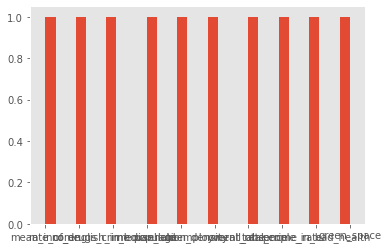

In [33]:
## To-Do ## For loop Hist 
count, bins, ignored = plt.hist(log_gcd_independent, 30)
plt.show()

VIF Method for Logged Variables

In [34]:
gcd_predictors_selected_VIF_log = drop_column_using_vif_(log_gcd_independent)
print("The columns remaining after VIF selection are:")
print(gcd_predictors_selected_VIF_log.columns)

Dropping: unemployment_rate
No columns dropped because VIF values are below threshold
The columns remaining after VIF selection are:
Index(['mean_income', 'rate_of_drugs_crime', 'no_english_in_household',
       'median_age', 'population_density', 'overall_absence',
       'total_crime_rate', 'people_in_bad_health', 'green_space'],
      dtype='object')


Multiple Regression for logged variables

In [37]:
X_values_log = sm.add_constant(gcd_predictors_selected_VIF_log)
y_values_log = log_gcd_dependent

In [38]:
regression_model_a = sm.OLS(y_values_log, X_values_log)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     388.6
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          4.50e-247
Time:                        23:34:53   Log-Likelihood:                 42.783
No. Observations:                 625   AIC:                            -65.57
Df Residuals:                     615   BIC:                            -21.19
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Application of Box-Cox Transformation

In [104]:
boxcox_gcd_independent = pd.DataFrame()
boxcox_gcd_dependent = pd.DataFrame()

In [105]:
for each_independent_variable in gcd_independent:
    # transform training data & save lambda value
    boxcox= "boxcox_"
    fitted_data = each_independent_variable
    boxcox_gcd_independent[each_independent_variable], fitted_lambda = stats.boxcox(gcd_independent[each_independent_variable]) 
    print(each_independent_variable + " is applied with lambda:" + str(fitted_lambda) )
print("end")

mean_income is applied with lambda:-1.573287006095047
rate_of_drugs_crime is applied with lambda:0.034316259763644115
no_english_in_household is applied with lambda:0.5323940163129998
median_age is applied with lambda:-1.67303991441498
population_density is applied with lambda:0.36931373582229343
unemployment_rate is applied with lambda:0.20826823342404527
overall_absence is applied with lambda:1.6889709424445087
total_crime_rate is applied with lambda:-0.47369223201217114
people_in_bad_health is applied with lambda:0.5286713126594236
green_space is applied with lambda:0.42188084729253295
end


In [106]:
boxcox_gcd_independent.head()

,mean_income,rate_of_drugs_crime,no_english_in_household,median_age,population_density,unemployment_rate,overall_absence,total_crime_rate,people_in_bad_health,green_space
0,0.6356,4.7682,22.0714,0.5964,44.6081,1.7663,6.3628,2.0100,1.7208,5.7653
1,0.6356,4.7850,34.1630,0.5956,78.2015,3.5787,10.2733,1.9319,2.1983,5.9471
2,0.6356,4.1190,17.3970,0.5959,70.2301,3.2826,10.6030,1.8624,3.2790,6.4291
3,0.6356,4.2007,20.5512,0.5959,75.2007,3.4928,11.2745,1.8714,3.4001,1.3976
4,0.6356,3.4653,15.4855,0.5961,49.1930,3.2687,12.3113,1.8698,3.3197,10.6206


In [107]:
boxcox_gcd_dependent["out_of_work"], fitted_lambda = stats.boxcox(gcd_dependent["out_of_work"])
print(fitted_lambda)

0.7118623804962197


In [108]:
boxcox_gcd_dependent.head()

,out_of_work
0,6.8334
1,13.8447
2,15.7043
3,15.3758
4,14.4867


In [109]:
boxcox_gcd_dependent.describe()

,out_of_work
count,625.0000
mean,10.9010
std,4.2998
min,-0.3150
25%,7.4593
50%,11.1961
75%,14.1859
max,20.9254


In [110]:
boxcox_gcd_independent.describe()

,mean_income,rate_of_drugs_crime,no_english_in_household,median_age,population_density,unemployment_rate,overall_absence,total_crime_rate,people_in_bad_health,green_space
count,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000,625.0000
mean,0.6356,4.3742,21.8541,0.5961,69.0516,2.6492,10.0002,1.8460,2.4647,6.6426
std,0.0000,0.5698,8.1029,0.0003,16.7452,0.5958,1.7360,0.0550,0.5977,2.6958
min,0.6356,2.5137,2.2166,0.5951,15.6304,1.2758,5.3054,1.6567,0.6894,-0.9440
25%,0.6356,3.9917,16.1846,0.5958,57.9383,2.1718,8.9950,1.8131,2.0967,4.8027
50%,0.6356,4.3611,22.0254,0.5960,67.7620,2.6780,9.9476,1.8484,2.4432,6.6089
75%,0.6356,4.7455,28.0239,0.5963,80.8917,3.0951,11.2745,1.8781,2.8555,8.4792
max,0.6356,6.2102,41.7049,0.5967,118.2657,4.1025,15.6308,2.0530,4.7961,13.3625


VIF Method 

In [111]:
gcd_predictors_selected_VIF_boxcox = drop_column_using_vif_(boxcox_gcd_independent)
print("The columns remaining after VIF selection are:")
print(gcd_predictors_selected_VIF_boxcox.columns)

Dropping: unemployment_rate
Dropping: population_density
No columns dropped because VIF values are below threshold
The columns remaining after VIF selection are:
Index(['mean_income', 'rate_of_drugs_crime', 'no_english_in_household',
       'median_age', 'overall_absence', 'total_crime_rate',
       'people_in_bad_health', 'green_space'],
      dtype='object')


/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [112]:
X_values_boxcox = sm.add_constant(gcd_predictors_selected_VIF_boxcox)
y_values_boxcox = boxcox_gcd_dependent

In [113]:
regression_model_a = sm.OLS(y_values_boxcox, X_values_boxcox)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:            out_of_work   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     443.9
Date:                Wed, 09 Dec 2020   Prob (F-statistic):          5.92e-250
Time:                        00:35:57   Log-Likelihood:                -1200.5
No. Observations:                 625   AIC:                             2419.
Df Residuals:                     616   BIC:                             2459.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3

## Drawing Multiple Hists

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

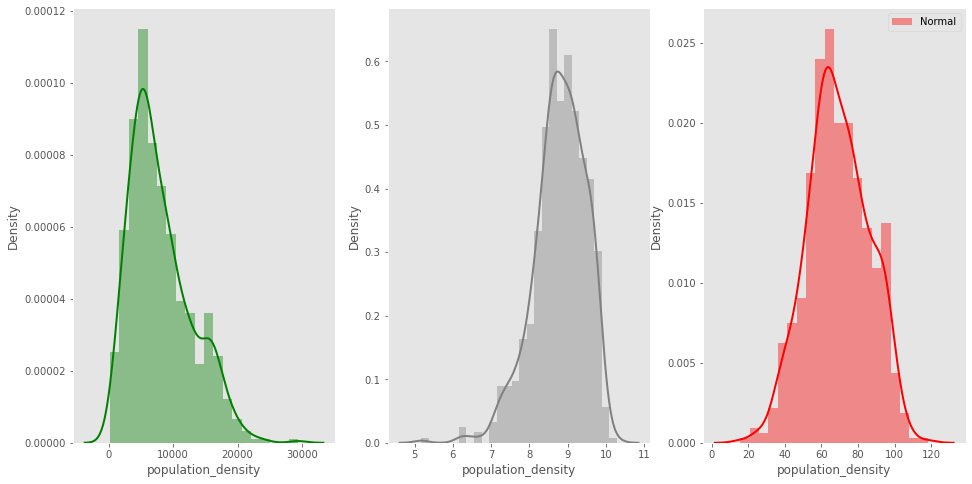

In [161]:
fig, ax = plt.subplots(1, 3)
variable_name = "population_density"
sns.distplot(gcd_independent[variable_name], hist = True, kde = True, 
            kde_kws = {'shade': False, 'linewidth': 2},  
            label = "asd", color ="green", ax = ax[0])
sns.distplot(log_gcd_independent[variable_name], hist = True, kde = True, 
            kde_kws = {'shade': False, 'linewidth': 2},  
            label = "Non-Normal", color ="gray", ax = ax[1]) 
  
sns.distplot(boxcox_gcd_independent[variable_name], hist = True, kde = True, 
            kde_kws = {'shade': False, 'linewidth': 2},  
            label = "Normal", color ="red", ax = ax[2]) 


# adding legends to the subplots 
plt.legend(loc = "upper right") 
  
# rescaling the subplots 
fig.set_figheight(8) 
fig.set_figwidth(16) 


## END

In [ ]:
# import modules 
import numpy as np 
from scipy import stats 
  
# plotting modules 
import seaborn as sns 
import matplotlib.pyplot as plt 
# generate non-normal data (exponential) 
 
  
# transform training data & save lambda value 
fitted_data, fitted_lambda = stats.boxcox(original_data) 
  
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(original_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 
  
# adding legends to the subplots 
plt.legend(loc = "upper right") 
  
# rescaling the subplots 
fig.set_figheight(5) 
fig.set_figwidth(10) 
  
print(f"Lambda value used for Transformation: {fitted_lambda}") 

Shapiro-Wilk Test to check data is normally disributed or not

In [147]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(fitted_data)

ShapiroResult(statistic=0.9978658556938171, pvalue=0.6237308979034424)

KSTSET for normally distributed test

In [139]:
from scipy.stats import kstest, norm
my_data = norm.rvs(size=1000)
ks_statistic, p_value = kstest(fitted_data, 'norm')
print(ks_statistic, p_value)

1.0 0.0


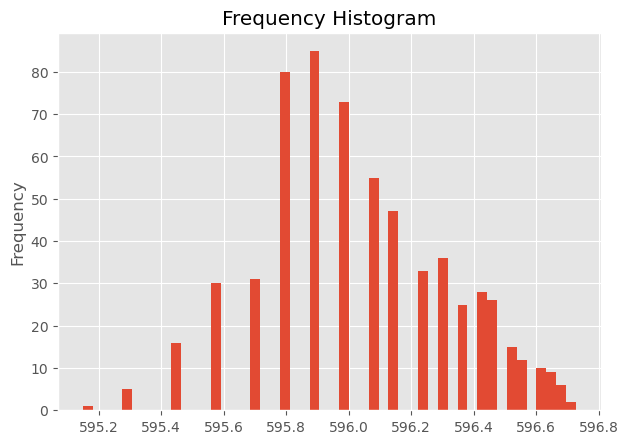

In [66]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = np.random.normal(size = 1000)
plt.hist(fitted_data, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');